<img src="./images/banner.png" width="800">

# Evaluation Metrics for Classification

Classification is a fundamental task where we aim to predict categorical outcomes. Whether we're detecting spam emails, diagnosing diseases, or recognizing handwritten digits, the success of our classification models hinges on their ability to make accurate predictions. But how do we quantify this success? How can we be confident that our model is performing well, and how do we compare different models? This is where evaluation metrics for classification come into play.


🔑 **Key Concept:** Evaluation metrics are quantitative measures that assess the performance of classification models, providing insights into their strengths and weaknesses.


Classification evaluation is not just about determining if a model is "good" or "bad." It's a nuanced process that involves understanding various aspects of model performance, such as:

1. Overall accuracy
2. Performance on different classes
3. Ability to handle imbalanced datasets
4. Robustness across different thresholds
5. Generalization to unseen data


<img src="./images/dog-clf.webp" width="800">

Imagine you've developed a model to detect a rare disease that affects only 1% of the population. If your model simply predicts "no disease" for every patient, it would be correct 99% of the time! However, this model is clearly useless for its intended purpose. This example illustrates why accuracy alone is often insufficient, and why we need a more comprehensive toolkit of evaluation metrics.


💡 **Pro Tip:** Always consider the context of your classification problem when choosing evaluation metrics. What's most important: minimizing false positives, minimizing false negatives, or balancing both?


Evaluation is not a one-time step at the end of model development. It's an integral part of the entire machine learning pipeline:

1. **During Model Selection:** Evaluation metrics guide us in choosing between different algorithms or model architectures.
2. **During Hyperparameter Tuning:** We use evaluation metrics to fine-tune our models and find the best configuration.
3. **For Model Validation:** Evaluation on a held-out test set helps us estimate how well our model will perform on unseen data.
4. **In Production Monitoring:** Ongoing evaluation ensures our deployed model continues to perform well over time.


The process of evaluating a classification model typically involves the following steps:

1. **Split the Data:** Divide your dataset into training, validation, and test sets.
2. **Train the Model:** Use the training data to build your model.
3. **Make Predictions:** Use your model to make predictions on the validation or test set.
4. **Compare Predictions:** Compare these predictions to the true labels.
5. **Calculate Metrics:** Compute various evaluation metrics based on this comparison.
6. **Interpret Results:** Analyze these metrics to understand model performance.
7. **Iterate:** Use insights from evaluation to improve your model if necessary.


While evaluation might seem straightforward, several challenges can complicate the process:

1. **Class Imbalance:** When some classes are much more frequent than others, many metrics can be misleading.
2. **Multi-class Problems:** Some metrics designed for binary classification don't extend easily to multi-class scenarios.
3. **Probabilistic Outputs:** Many models output probabilities rather than hard classifications, requiring threshold-based metrics.
4. **Cost-sensitive Classification:** In some domains, different types of errors have vastly different consequences.


🤔 **Why This Matters:** Understanding these challenges is crucial for choosing appropriate evaluation metrics and interpreting them correctly in the context of your specific problem.


As we dive deeper into various evaluation metrics in the following sections, we'll explore how to address these challenges and gain a comprehensive understanding of classification model performance.


In the next section, we'll start our journey into specific evaluation metrics by examining the confusion matrix - a fundamental tool that forms the basis for many other metrics we'll encounter.

**Table of contents**<a id='toc0_'></a>    
- [Confusion Matrix: The Foundation of Classification Metrics](#toc1_)    
  - [Constructing a Confusion Matrix](#toc1_1_)    
  - [Interpreting the Confusion Matrix](#toc1_2_)    
  - [Beyond Binary Classification](#toc1_3_)    
  - [Limitations and Considerations](#toc1_4_)    
  - [From Confusion Matrix to Metrics](#toc1_5_)    
- [Basic Metrics: Accuracy, Precision, Recall, and F1-Score](#toc2_)    
  - [Accuracy: The Simplest Metric](#toc2_1_)    
  - [Precision: Focus on False Positives](#toc2_2_)    
  - [Recall: Focus on False Negatives](#toc2_3_)    
  - [F1-Score: Balancing Precision and Recall](#toc2_4_)    
  - [When to Use Each Metric](#toc2_5_)    
  - [Beyond Binary Classification](#toc2_6_)    
  - [Limitations and Considerations](#toc2_7_)    
- [Advanced Metrics: ROC Curve and AUC](#toc3_)    
  - [Constructing the ROC Curve](#toc3_1_)    
  - [Interpreting the ROC Curve](#toc3_2_)    
  - [Area Under the Curve (AUC)](#toc3_3_)    
  - [Advantages of ROC and AUC](#toc3_4_)    
  - [Limitations and Considerations](#toc3_5_)    
  - [ROC for Multi-class Problems](#toc3_6_)    
  - [Practical Considerations](#toc3_7_)    
- [Cross-validation Techniques for Robust Evaluation](#toc4_)    
  - [Setting Up the Environment](#toc4_1_)    
  - [Basic Hold-out Validation](#toc4_2_)    
  - [K-Fold Cross-Validation](#toc4_3_)    
  - [Stratified K-Fold Cross-Validation](#toc4_4_)    
  - [Leave-One-Out Cross-Validation (LOOCV)](#toc4_5_)    
  - [Choosing the Right Cross-Validation Technique](#toc4_6_)    
  - [Practical Considerations](#toc4_7_)    
- [Practical Considerations and Choosing the Right Metric](#toc5_)    
  - [Understanding the Problem Context](#toc5_1_)    
  - [Choosing the Right Metric](#toc5_2_)    
  - [Practical Example: Breast Cancer Classification](#toc5_3_)    
  - [Handling Class Imbalance](#toc5_4_)    
  - [Cross-Validation and Metric Stability](#toc5_5_)    
  - [Threshold Adjustment](#toc5_6_)    
  - [Interpretability and Communication](#toc5_7_)    
  - [Continuous Monitoring](#toc5_8_)    
- [Summary](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Confusion Matrix: The Foundation of Classification Metrics](#toc0_)

The confusion matrix is a cornerstone of classification evaluation, providing a tabular summary of a model's performance. Despite its simple structure, the confusion matrix encapsulates rich information about how well a classifier is performing, serving as the foundation for many other evaluation metrics.


A confusion matrix is a table that allows visualization of a classification model's performance. For a binary classification problem, it's typically a 2x2 matrix:


<img src="./images/cm.png" width="800">

Where:
- TN (True Negative): Correctly predicted negative class
- FP (False Positive): Incorrectly predicted positive class
- FN (False Negative): Incorrectly predicted negative class
- TP (True Positive): Correctly predicted positive class


🔑 **Key Concept:** The confusion matrix shows not just how many predictions were correct, but also the types of errors the model is making.


### <a id='toc1_1_'></a>[Constructing a Confusion Matrix](#toc0_)


Let's walk through the process of creating a confusion matrix:

1. Make predictions on your validation or test set.
2. Compare these predictions to the true labels.
3. Count the occurrences of each possible outcome (TN, FP, FN, TP).
4. Organize these counts into the matrix structure.


Here's a Python example using scikit-learn:


In [1]:
from sklearn.metrics import confusion_matrix
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the data
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = LogisticRegression(max_iter=5)  # max_iter is set low on purpose to show the ROC curve
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)[:, 1]

y_true = y_test
confusion_matrix(y_test, y_pred)

/Users/hejazizo/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[28, 15],
       [ 0, 71]])

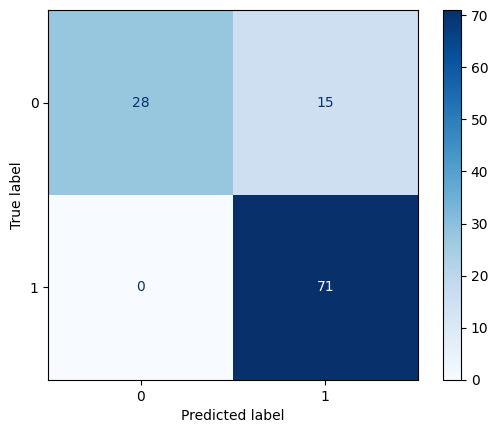

In [2]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap="Blues")

Interpreting this:
- 28 true negatives
- 71 true positives
- 15 false positives
- 0 false negatives


### <a id='toc1_2_'></a>[Interpreting the Confusion Matrix](#toc0_)


The confusion matrix provides immediate insights into model performance:

1. **Correct Classifications:** The diagonal elements (top-left to bottom-right) represent correct classifications.
2. **Misclassifications:** Off-diagonal elements represent errors.
3. **Type I and Type II Errors:** False positives are Type I errors, while false negatives are Type II errors.


💡 **Pro Tip:** Always consider the context of your problem when interpreting a confusion matrix. In some cases, false positives might be more problematic, while in others, false negatives could be more critical.


### <a id='toc1_3_'></a>[Beyond Binary Classification](#toc0_)


While we've focused on binary classification, confusion matrices extend to multi-class problems as well. For a problem with $n$ classes, you'll have an $n \times n$ matrix:

```
           Predicted Class
           Class 1   Class 2   ...   Class n
Class 1      TP1       E12     ...     E1n
Class 2      E21       TP2     ...     E2n
...          ...       ...     ...     ...
Class n      En1       En2     ...     TPn
```


<img src="./images/cm-multiclass.png" width="800">

In [3]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y_true_multi = data.target

y_pred_multi = np.random.randint(0, 3, size=len(y_true_multi))

cm = confusion_matrix(y_true_multi, y_pred_multi)
cm

array([[18, 15, 17],
       [16, 21, 13],
       [19, 18, 13]])

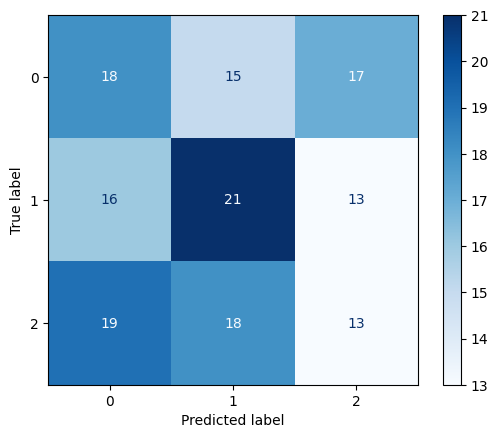

In [4]:
ConfusionMatrixDisplay.from_predictions(y_true_multi, y_pred_multi, cmap="Blues")

<Axes: >

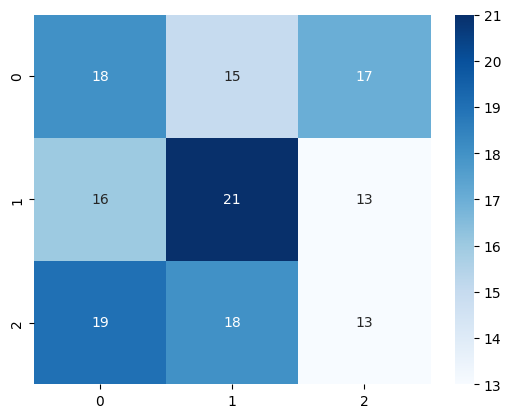

In [5]:
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

Here, TPi represents true positives for class i, and Eij represents misclassifications where class i was predicted as class j.


### <a id='toc1_4_'></a>[Limitations and Considerations](#toc0_)


While incredibly useful, the confusion matrix has some limitations:

1. **Threshold Dependency:** For models that output probabilities, the confusion matrix depends on the chosen classification threshold.
2. **Class Imbalance:** In imbalanced datasets, the matrix might not fully represent model performance.
3. **Interpretability:** As the number of classes increases, the matrix becomes harder to interpret at a glance.


🤔 **Why This Matters:** Understanding these limitations helps us know when to rely on the confusion matrix and when to seek additional metrics for a complete picture of model performance.


### <a id='toc1_5_'></a>[From Confusion Matrix to Metrics](#toc0_)


The true power of the confusion matrix lies in its ability to generate various performance metrics. In the following sections, we'll explore how elements of the confusion matrix are combined to create metrics like accuracy, precision, recall, and F1-score.


❗️ **Important Note:** While the confusion matrix provides valuable insights, it's often most useful when combined with other evaluation metrics. No single metric tells the whole story of model performance.


In the next section, we'll dive into these derived metrics, starting with the most basic: accuracy, precision, recall, and the F1-score. These metrics build upon the foundation laid by the confusion matrix, providing more specific insights into different aspects of classifier performance.

## <a id='toc2_'></a>[Basic Metrics: Accuracy, Precision, Recall, and F1-Score](#toc0_)

Building upon the foundation of the confusion matrix, we now turn our attention to four fundamental metrics in classification evaluation: accuracy, precision, recall, and the F1-score. These metrics provide different perspectives on model performance and are essential tools in any data scientist's toolkit.


<img src="./images/disease-metric.png" width="800">

### <a id='toc2_1_'></a>[Accuracy: The Simplest Metric](#toc0_)


Accuracy is the most intuitive metric, measuring the proportion of correct predictions among the total number of cases examined.


🔑 **Key Concept:** Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)


In terms of the confusion matrix:

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$


While accuracy is easy to understand and communicate, it has limitations, particularly when dealing with imbalanced datasets. Consider a disease detection model where only 1% of the population has the disease. A model that always predicts "no disease" would have 99% accuracy but would be useless in practice.


In [6]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


### <a id='toc2_2_'></a>[Precision: Focus on False Positives](#toc0_)


Precision measures the accuracy of positive predictions. It's the ratio of correctly predicted positive examples to the total predicted positive examples.

$Precision = \frac{TP}{TP + FP}$

Precision is particularly useful when the cost of false positives is high. For instance, in a spam detection system, high precision ensures that legitimate emails are not incorrectly classified as spam.


In [7]:
from sklearn.metrics import precision_score

precision = precision_score(y_true, y_pred)
print(f"Precision: {precision:.2f}")


Precision: 0.83


### <a id='toc2_3_'></a>[Recall: Focus on False Negatives](#toc0_)


Recall, also known as sensitivity or true positive rate, measures the proportion of actual positive cases that were correctly identified.

$Recall = \frac{TP}{TP + FN}$


Recall is crucial when the cost of false negatives is high. In medical diagnosis, for example, high recall ensures that we don't miss actual cases of a disease.


In [8]:
from sklearn.metrics import recall_score

recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2f}")


Recall: 1.00


💡 **Pro Tip:** There's often a trade-off between precision and recall. Increasing one typically decreases the other. The balance you choose depends on your specific problem and the relative costs of different types of errors.


<img src="./images/clf-metrics-viz.webp" width="800">

### <a id='toc2_4_'></a>[F1-Score: Balancing Precision and Recall](#toc0_)


The F1-score is the harmonic mean of precision and recall, providing a single score that balances both metrics.

$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$


The F1-score is particularly useful when you have an uneven class distribution. It reaches its best value at 1 and worst at 0.


In [9]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred)
print(f"F1-score: {f1:.2f}")

F1-score: 0.90


### <a id='toc2_5_'></a>[When to Use Each Metric](#toc0_)


<img src="./images/metrics-comparison.jpg" width="800">

<img src="./images/case-1-cm.png" width="800">

<img src="./images/case-2-cm.png" width="800">

<img src="./images/loan-cm.png" width="800">

- **Accuracy:** Best when the classes are balanced and all misclassifications have similar cost.
- **Precision:** Use when the cost of false positives is high.
- **Recall:** Use when the cost of false negatives is high.
- **F1-Score:** Use when you need to balance precision and recall, especially with imbalanced datasets.


### <a id='toc2_7_'></a>[Limitations and Considerations](#toc0_)


While these metrics are powerful, they have limitations:

1. **Threshold Dependency:** For models that output probabilities, these metrics depend on the chosen classification threshold.
2. **Class Imbalance:** In highly imbalanced datasets, even these metrics can be misleading.
3. **Equal Error Costs:** These metrics assume that all types of errors are equally costly, which isn't always true in practice.


Understanding these limitations helps you choose the right metrics for your specific problem and interpret them correctly.


❗️ **Important Note:** While these basic metrics provide valuable insights, they don't tell the whole story. In the next section, we'll explore more advanced metrics like ROC curves and AUC, which provide a more comprehensive view of classifier performance across all possible thresholds.


By mastering these basic metrics and understanding their strengths and limitations, you'll be well-equipped to evaluate and compare classification models effectively. Remember, the choice of metric should always be guided by the specific requirements and constraints of your problem.

## <a id='toc3_'></a>[Advanced Metrics: ROC Curve and AUC](#toc0_)

While the basic metrics we've discussed provide valuable insights, they often depend on a specific classification threshold. The Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) offer a more comprehensive view of classifier performance across all possible thresholds. These advanced metrics are particularly useful for comparing different models and for problems where the optimal threshold isn't known in advance.


<img src="./images/roc.png" width="800">

The ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It's created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.


🔑 **Key Concept:** 
- True Positive Rate (TPR) = Recall = $\frac{TP}{TP + FN}$
- False Positive Rate (FPR) = $\frac{FP}{FP + TN}$


The ROC curve starts at the point (0,0) and ends at (1,1). A perfect classifier would reach the top-left corner of the plot (0,1), representing 100% TPR and 0% FPR.


> The term "Receiver Operating Characteristic" (ROC) has its origins in signal detection theory and dates back to World War II. Here's a brief explanation of why it's called ROC:
> 
> 1. Historical Context:
>    - The concept was developed during World War II for radar signal detection.
>    - It was used to analyze radar signals to distinguish actual aircraft from noise.
> 
> 2. "Receiver":
>    - Refers to the radio operator (the "receiver" of the signal) who had to decide whether a blip on the radar screen represented an enemy aircraft or just noise.
> 
> 3. "Operating":
>    - Relates to the operator's task of making decisions based on the received signals.
> 
> 4. "Characteristic":
>    - Describes the performance or behavior of the receiver (operator) in distinguishing between signal and noise.
> 
> 5. Original Application:
>    - The ROC curve plotted the probability of detecting a real aircraft (true positive rate) against the probability of a false alarm (false positive rate) at various threshold settings.
> 
> 6. Evolution:
>    - Over time, the concept was adopted and adapted for use in psychology, medicine, and eventually machine learning and data science.
> 
> The name "Receiver Operating Characteristic" stuck, even as its application expanded far beyond its original radar signal detection context. Today, while the term might seem a bit outdated given its current uses, it remains the standard terminology in various fields, including machine learning and medical diagnostics.

### <a id='toc3_1_'></a>[Constructing the ROC Curve](#toc0_)


To create an ROC curve:

1. For each possible threshold:
   - Calculate the TPR and FPR
   - Plot these values as a single point
2. Connect these points to form the curve


Here's how to plot an ROC curve using scikit-learn:


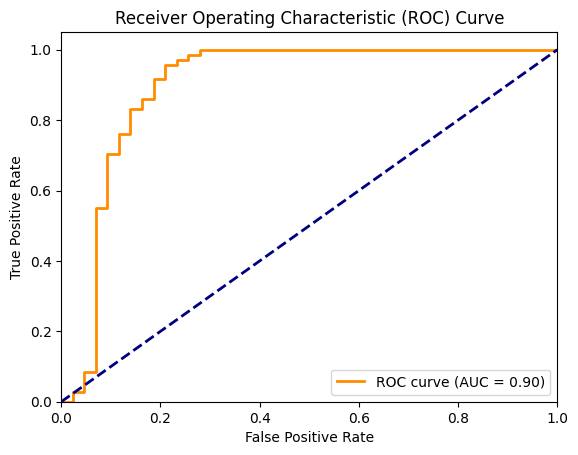

In [17]:
# Assume y_true are the true labels and y_scores are the predicted probabilities
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [18]:
thresholds

array([           inf, 8.42317447e-01, 7.82316602e-01, 7.78008790e-01,
       7.72733722e-01, 7.60519794e-01, 6.87652632e-01, 6.87571704e-01,
       6.59893221e-01, 6.57982394e-01, 6.50286397e-01, 6.48869031e-01,
       6.43320799e-01, 6.40265603e-01, 6.30707048e-01, 6.29851037e-01,
       6.21101392e-01, 6.14515410e-01, 5.96530306e-01, 5.84480149e-01,
       5.83437853e-01, 5.75713383e-01, 5.75429569e-01, 5.67061878e-01,
       5.57752826e-01, 8.80724638e-05])

### <a id='toc3_2_'></a>[Interpreting the ROC Curve](#toc0_)


<img src="./images/roc-comparison.png" width="800">

The ROC curve provides several insights:

1. **Diagonal Line:** A diagonal line from (0,0) to (1,1) represents the performance of a random classifier. Any useful classifier should perform better than this.

2. **Above the Diagonal:** Points above the diagonal represent good classification results (better than random).

3. **Below the Diagonal:** Points below the diagonal represent poor classification results (worse than random).

4. **Curve Shape:** The more the curve hugs the top-left corner, the better the model's performance.


💡 **Pro Tip:** The ROC curve is especially useful when you need to visualize and compare the performance of multiple classifiers.


### <a id='toc3_3_'></a>[Area Under the Curve (AUC)](#toc0_)


While the ROC curve is informative, it can be challenging to compare multiple models using curves alone. This is where AUC comes in.


AUC provides an aggregate measure of performance across all possible classification thresholds. It represents the probability that the classifier will rank a randomly chosen positive instance higher than a randomly chosen negative instance.

AUC ranges from 0 to 1, where:
- AUC = 0.5 represents a random classifier
- AUC = 1.0 represents a perfect classifier
- AUC < 0.5 represents a classifier performing worse than random guessing


In [19]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_true, y_pred)
print(f"AUC: {auc:.2f}")

AUC: 0.83


### <a id='toc3_4_'></a>[Advantages of ROC and AUC](#toc0_)


1. **Threshold Independence:** ROC and AUC evaluate model performance across all possible thresholds.

2. **Insensitivity to Class Imbalance:** Unlike accuracy, ROC is not affected by class imbalance.

3. **Model Comparison:** AUC provides a single number to compare different models.

4. **Interpretability:** AUC has a probabilistic interpretation, making it intuitive to understand.


### <a id='toc3_5_'></a>[Limitations and Considerations](#toc0_)


While powerful, ROC and AUC have some limitations:

1. **Irrelevance of Predicted Probabilities:** AUC only considers the ranking of the predictions, not their absolute values.

2. **Insensitivity to Class Distribution Changes:** If the class distribution in your test set doesn't match real-world conditions, AUC might not reflect real-world performance.

3. **Equal Treatment of Errors:** ROC treats the costs of false positives and false negatives as equal, which isn't always appropriate.


Understanding these limitations helps you decide when ROC and AUC are appropriate and when you might need additional metrics.


### <a id='toc3_6_'></a>[ROC for Multi-class Problems](#toc0_)


For multi-class problems, we can use a one-vs-rest approach:

1. For each class, treat it as the positive class and all others as negative.
2. Compute the ROC curve and AUC for each class.
3. Average the AUCs (macro-averaging) or weight them by class frequency (micro-averaging).


In [20]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_true = y_test

In [21]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Assume y_true are the true labels and y_scores are the predicted probabilities for each class
# Binarize the output
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
y_true_bin

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [22]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(max_iter=3)
log_clf.fit(X_train, y_train)

y_scores = log_clf.predict_proba(X_test)
accuracy_score(y_true, log_clf.predict(X_test))


/Users/hejazizo/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7111111111111111

In [23]:
log_clf.classes_

array([0, 1, 2])

In [24]:
y_scores

array([[0.20859509, 0.42681668, 0.36458823],
       [0.44032149, 0.34045412, 0.21922439],
       [0.11486006, 0.45028574, 0.4348542 ],
       [0.21358075, 0.42280784, 0.36361141],
       [0.20574904, 0.43387802, 0.36037294],
       [0.43093595, 0.34212227, 0.22694178],
       [0.25980713, 0.40686661, 0.33332626],
       [0.18357023, 0.43452815, 0.38190162],
       [0.19587148, 0.42895866, 0.37516987],
       [0.2419593 , 0.41477638, 0.34326432],
       [0.1887659 , 0.43089199, 0.38034211],
       [0.42331878, 0.34219381, 0.23448741],
       [0.45584792, 0.33201072, 0.21214136],
       [0.42183857, 0.3436393 , 0.23452213],
       [0.4469483 , 0.33292016, 0.22013154],
       [0.21608242, 0.42485957, 0.359058  ],
       [0.15257277, 0.43527695, 0.41215028],
       [0.23621348, 0.41487666, 0.34890986],
       [0.21237055, 0.42103722, 0.36659224],
       [0.15475814, 0.43386483, 0.41137703],
       [0.41386825, 0.34521097, 0.24092078],
       [0.19286998, 0.42682354, 0.38030648],
       [0.

In [25]:
# Compute micro-average ROC curve and AUC
auc_micro = roc_auc_score(y_true_bin, y_scores, average="micro")
print(f"Micro-average AUC: {auc_micro:.2f}")

Micro-average AUC: 0.89


In [26]:
# Compute macro-average AUC
auc_macro = roc_auc_score(y_true_bin, y_scores, average="macro")
print(f"Macro-average AUC: {auc_macro:.2f}")

Macro-average AUC: 0.87


### <a id='toc3_7_'></a>[Practical Considerations](#toc0_)


When using ROC and AUC:

1. **Calibration:** If you need well-calibrated probability outputs, consider techniques like Platt scaling or isotonic regression.

2. **Threshold Selection:** While ROC considers all thresholds, you may still need to choose a specific threshold for deployment. Consider using the point on the ROC curve closest to (0,1) or use domain knowledge.

3. **Comparison with Other Metrics:** Always consider ROC/AUC in conjunction with other metrics like precision, recall, and F1-score for a comprehensive evaluation.


<img src="./images/clf-performance-metrics.png" width="800">

❗️ **Important Note:** While ROC and AUC are powerful tools, they're not always the best choice. For highly imbalanced datasets, precision-recall curves might be more informative.


By mastering ROC curves and AUC, you add powerful tools to your evaluation toolkit. These metrics provide a nuanced view of classifier performance, allowing for robust model comparison and selection. In the next section, we'll explore how to handle evaluation in multi-class classification scenarios, building on the concepts we've covered so far.

## <a id='toc4_'></a>[Cross-validation Techniques for Robust Evaluation](#toc0_)

Cross-validation is a crucial technique in machine learning that helps us assess how well our models will generalize to independent datasets. It's particularly important when we have limited data or when we want to ensure our model's performance is consistent across different subsets of our data.


Let's explore various cross-validation techniques using the breast cancer dataset, a popular binary classification problem in machine learning.


### <a id='toc4_1_'></a>[Setting Up the Environment](#toc0_)


First, let's import the necessary libraries and load the breast cancer dataset:


In [29]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, LeaveOneOut
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize our classifier
clf = SVC(kernel='rbf', random_state=42)

### <a id='toc4_2_'></a>[Basic Hold-out Validation](#toc0_)


The simplest form of validation is the hold-out method, which we've already used by splitting our data into training and testing sets. While simple, this method can be sensitive to how the data is split:


In [30]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")

Accuracy: 0.9474
Precision: 0.9221
Recall: 1.0000
F1-score: 0.9595


🔑 **Key Concept:** Hold-out validation is quick but may not provide a robust estimate of model performance, especially with limited data.


**When to use:** 
- When you have a very large dataset
- When computational resources are limited
- For quick, initial model evaluations


### <a id='toc4_3_'></a>[K-Fold Cross-Validation](#toc0_)


K-Fold CV divides the data into K subsets (folds), trains on K-1 folds, and validates on the remaining fold. This process is repeated K times:


<img src="./images/kfold.png" width="800">

In [31]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

cv_scores = cross_val_score(clf, X, y, cv=kf)

print(f"K-Fold CV Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

K-Fold CV Scores: [0.94736842 0.94736842 0.89473684 0.92982456 0.86725664]
Mean CV Score: 0.9173 (+/- 0.0631)


💡 **Pro Tip:** K-Fold CV provides a more robust estimate of model performance by using all data for both training and validation.


**When to use:**
- When you have a moderate amount of data
- When you want a good balance between bias and variance in your performance estimate
- When your classes are roughly balanced


### <a id='toc4_4_'></a>[Stratified K-Fold Cross-Validation](#toc0_)


Stratified K-Fold CV ensures that the proportion of samples for each class is roughly the same in each fold:


<img src="./images/stratified-kfold.png" width="800">

In [32]:
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

cv_scores = cross_val_score(clf, X, y, cv=skf)

print(f"Stratified K-Fold CV Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Stratified K-Fold CV Scores: [0.93859649 0.87719298 0.89473684 0.93859649 0.92035398]
Mean CV Score: 0.9139 (+/- 0.0488)


🔑 **Key Concept:** Stratified K-Fold is particularly useful for imbalanced datasets, ensuring each fold is representative of the overall class distribution.


**When to use:**
- When you have imbalanced classes
- When you want to ensure each fold is representative of the overall class distribution
- In most classification problems, as it generally provides a more reliable estimate than regular K-Fold CV


### <a id='toc4_5_'></a>[Leave-One-Out Cross-Validation (LOOCV)](#toc0_)


LOOCV is an extreme form of K-Fold CV where K equals the number of samples:


<img src="./images/loo-kfold.png" width="800">

In [33]:
loo = LeaveOneOut()

cv_scores = cross_val_score(clf, X, y, cv=loo)

print(f"LOOCV Mean Score: {cv_scores.mean():.4f}")

LOOCV Mean Score: 0.9121


❗️ **Important Note:** While LOOCV provides an nearly unbiased estimate of model performance, it can be computationally expensive for large datasets.


**When to use:**
- When you have a very small dataset
- When you need an nearly unbiased estimate of model performance
- When computational resources are not a concern


### <a id='toc4_6_'></a>[Choosing the Right Cross-Validation Technique](#toc0_)


The choice of cross-validation technique depends on several factors:

1. **Dataset Size:**
   - Large datasets: Hold-out or K-Fold CV
   - Small datasets: LOOCV or K-Fold with higher K

2. **Class Balance:**
   - Balanced classes: K-Fold CV
   - Imbalanced classes: Stratified K-Fold CV

3. **Computational Resources:**
   - Limited resources: Hold-out or K-Fold with smaller K
   - Abundant resources: LOOCV or K-Fold with larger K

4. **Model Complexity:**
   - Simple models: Any method
   - Complex models: K-Fold or Stratified K-Fold to get a more robust estimate

5. **Evaluation Goals:**
   - Quick initial assessment: Hold-out
   - Robust performance estimate: K-Fold or Stratified K-Fold
   - Nearly unbiased estimate: LOOCV


### <a id='toc4_7_'></a>[Practical Considerations](#toc0_)


1. **Choosing K:** Common choices for K are 5 or 10. Higher K gives a less biased estimate but higher variance and more computational cost.

2. **Shuffling:** Always shuffle your data before splitting, unless you're dealing with time series data.

3. **Reporting Results:** Always report both the mean and standard deviation of CV scores to give a sense of the model's performance variability.


In [34]:
def report_cv_results(cv_scores):
    print(f"CV Scores: {cv_scores}")
    print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Example usage
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, X, y, cv=skf)
report_cv_results(cv_scores)

CV Scores: [0.93859649 0.87719298 0.89473684 0.93859649 0.92035398]
Mean CV Score: 0.9139 (+/- 0.0488)


4. **Data Leakage:** Be cautious of potential data leakage. Ensure that any preprocessing steps are performed within the CV loop, not on the entire dataset beforehand.


Cross-validation is a powerful tool for robust model evaluation. By understanding and appropriately applying these techniques, you can gain confidence in your model's performance and its ability to generalize to new, unseen data. Remember, the choice of CV technique should be guided by your dataset characteristics, computational resources, and the specific requirements of your machine learning task.

## <a id='toc5_'></a>[Practical Considerations and Choosing the Right Metric](#toc0_)

Selecting the appropriate evaluation metrics and applying them correctly is crucial for developing effective machine learning models. This section will guide you through practical considerations and help you choose the right metrics for your classification tasks.


### <a id='toc5_1_'></a>[Understanding the Problem Context](#toc0_)


Before diving into metrics, it's essential to understand the context of your problem:

1. **Business Objectives:** What are the goals of your model? Are false positives or false negatives more costly?

2. **Class Distribution:** Is your dataset balanced or imbalanced?

3. **Number of Classes:** Is it a binary or multi-class problem?

4. **Interpretability Requirements:** Do stakeholders need to easily understand the model's performance?


🔑 **Key Concept:** The choice of metric should align with your problem's specific requirements and constraints.


### <a id='toc5_2_'></a>[Choosing the Right Metric](#toc0_)


Here's a guide to help you choose the right metric based on different scenarios:

1. **Balanced Dataset, Equal Error Costs:**
   - Accuracy
   - F1-Score

2. **Imbalanced Dataset:**
   - Precision-Recall curve
   - F1-Score
   - Area Under the ROC Curve (AUC-ROC)

3. **High Cost of False Positives:**
   - Precision
   - Specificity

4. **High Cost of False Negatives:**
   - Recall (Sensitivity)
   - Negative Predictive Value

6. **Multi-class Problems (Will be covered in the next lecture):**
   - Macro/Micro/Weighted averages of Precision, Recall, F1-Score
   - Cohen's Kappa

7. **Ranking Performance:**
   - Area Under the ROC Curve (AUC-ROC)
   - Mean Average Precision


### <a id='toc5_3_'></a>[Practical Example: Breast Cancer Classification](#toc0_)


Let's use the breast cancer dataset to illustrate how to choose and apply different metrics:


In [35]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

# Split and preprocess
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
clf = SVC(probability=True, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict
y_pred = clf.predict(X_test_scaled)
y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")

Accuracy: 0.9825
Precision: 0.9726
Recall: 1.0000
F1-Score: 0.9861
AUC-ROC: 0.9974


💡 **Pro Tip:** Always evaluate your model using multiple metrics to get a comprehensive view of its performance.


### <a id='toc5_4_'></a>[Handling Class Imbalance](#toc0_)


When dealing with imbalanced datasets:

1. **Use Appropriate Metrics:** Precision, Recall, F1-Score, and AUC-ROC are often more informative than accuracy.

2. **Consider Resampling:** Techniques like oversampling, undersampling, or SMOTE can help balance your dataset.

3. **Adjust Class Weights:** Many algorithms allow you to assign higher weights to the minority class.


```python
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

# Resampling example
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Class weights example
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
clf_weighted = SVC(probability=True, class_weight=dict(enumerate(class_weights)), random_state=42)
```


### <a id='toc5_5_'></a>[Cross-Validation and Metric Stability](#toc0_)


To ensure the stability of your metrics:

1. **Use Cross-Validation:** This provides a more robust estimate of model performance.

2. **Report Mean and Standard Deviation:** This gives insight into the variability of your model's performance.


In [37]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"Mean AUC-ROC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Mean AUC-ROC: 0.9949 (+/- 0.0119)


### <a id='toc5_6_'></a>[Threshold Adjustment](#toc0_)


For binary classifiers that output probabilities:

1. **ROC Curve:** Use this to visualize the trade-off between true positive rate and false positive rate at various thresholds.

2. **Precision-Recall Curve:** Particularly useful for imbalanced datasets.


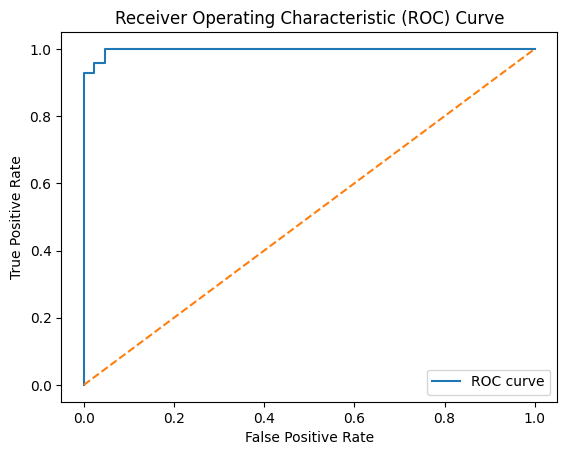

In [38]:
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

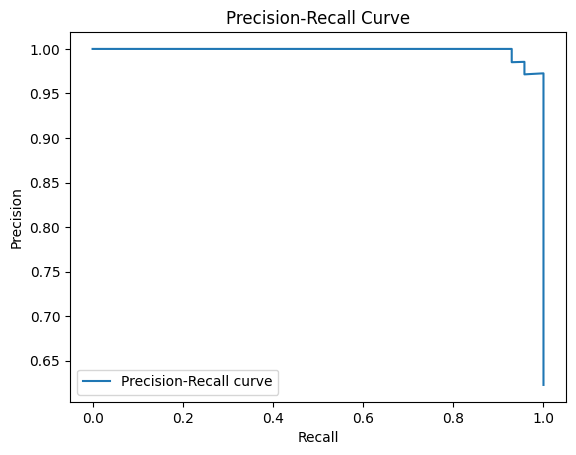

In [39]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

❗️ **Important Note:** The choice of threshold can significantly impact your model's performance. Always consider the business context when setting this threshold.


### <a id='toc5_7_'></a>[Interpretability and Communication](#toc0_)


1. **Confusion Matrix:** Provides a detailed breakdown of correct and incorrect classifications.

2. **Feature Importance:** Helps stakeholders understand which features are driving the model's decisions.

3. **Visualizations:** ROC curves, Precision-Recall curves, and confusion matrices can help communicate model performance effectively.


🤔 **Why This Matters:** Clear communication of model performance is crucial for stakeholder buy-in and effective decision-making.


### <a id='toc5_8_'></a>[Continuous Monitoring](#toc0_)


In production environments:

1. **Monitor Metric Drift:** Regularly check if your model's performance is degrading over time.

2. **Update Baselines:** As your data distribution changes, you may need to update your performance baselines.

3. **A/B Testing:** When introducing new models, use A/B testing to compare performance metrics.


By considering these practical aspects and choosing the right metrics, you can ensure that your classification models are not only performing well but also aligned with your business objectives. Remember, the goal is not just to optimize a single number, but to create models that provide real value in their intended applications.

## <a id='toc6_'></a>[Summary](#toc0_)

Throughout this lecture, we've explored the crucial topic of evaluation metrics for classification problems. Let's recap the key points:

1. **Importance of Evaluation:** Proper evaluation is essential for understanding model performance, comparing different models, and ensuring our solutions meet business requirements.

2. **Confusion Matrix:** We started with the confusion matrix, the foundation for many classification metrics, providing a detailed view of correct and incorrect predictions.

3. **Basic Metrics:** We covered accuracy, precision, recall, and F1-score, understanding their calculations and use cases.

4. **Advanced Metrics:** We explored ROC curves and AUC, which provide a threshold-independent evaluation of classifier performance.

5. **Cross-validation:** We learned about various cross-validation techniques, including K-Fold, Stratified K-Fold, and Leave-One-Out CV, understanding when to use each.

6. **Practical Considerations:** We discussed how to choose the right metrics based on problem context, handle class imbalance, and adjust classification thresholds.


Here are some key takeaways:
- No single metric tells the whole story. Use a combination of metrics for a comprehensive evaluation.
- Always consider the business context and costs associated with different types of errors.
- Cross-validation is crucial for getting reliable estimates of model performance.
- For imbalanced datasets, look beyond accuracy to metrics like precision, recall, F1-score, and AUC.
- Visualizations like ROC curves and Precision-Recall curves can provide valuable insights.


💡 **Pro Tip:** Remember that the goal of model evaluation is not just to optimize a metric, but to ensure your model solves the real-world problem it's designed for.


As you continue your journey in machine learning:

1. Practice applying these metrics to various datasets and problems.
2. Explore how different algorithms perform under various evaluation criteria.
3. Stay updated on new evaluation techniques, especially for specific domains or problem types.
4. Always tie your evaluation back to the business or research question you're trying to answer.


By mastering these evaluation techniques, you'll be well-equipped to develop, select, and deploy classification models that truly meet the needs of your projects and stakeholders.